In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import helpers.mab_bernoulli as brn
import matplotlib.pyplot as plt

In [24]:
#parameter listing
T = 5000 #simulation horizon
K_list = np.arange(2, 16, 2) #number of arms
delta_list = [0.2] #reward gap between best and worst arms
data_amt_list = np.arange(0, 100, 5) #number of data points per arm
num_samples = 20000

In [ ]:
df_cols = ["NumArms", "ArmGap", "ArmData", "NumSamples"]
c = list(range(1, T + 1))
low_keys = ["low_"+str(n) for n in c]
high_keys = ["high_"+str(n) for n in c]
df_cols = df_cols + c + low_keys + high_keys
fs_df = pd.DataFrame(columns=df_cols)
ar_df = pd.DataFrame(columns=df_cols)

In [25]:
for K in tqdm(K_list, desc = "Number of Arms"):
    for delta in tqdm(delta_list, leave = False, desc = "Arm Gap"):
        arms = [0.5 - delta/2 for _ in range(K-1)]
        opt_mean = 0.5 + delta / 2
        arms.append(opt_mean)
        for data_amt in tqdm(data_amt_list, leave = False, desc = "Data per arm"):

            regret_vecs = [np.zeros((num_samples, T)) for _ in range(2)]
            for i in tqdm(range(num_samples), leave = False):
                arm_data = [brn.gen_data(arms[i], data_amt) for i in range(K)]
                fs_rewards = brn.FS_path(T, arms, brn.flat_priors(K), arm_data)
                ar_rewards = brn.AR_path(T, arms, brn.flat_priors(K), arm_data)

                fs_regrets = opt_mean - np.array(fs_rewards)
                ar_regrets = opt_mean - np.array(ar_rewards)

                regret_vecs[0][i] = np.cumsum(fs_regrets)
                regret_vecs[1][i] = np.cumsum(ar_regrets)

            avgs = np.mean(regret_vecs, axis=1)
            lower_CBs = avgs-2*np.std(regret_vecs,axis=1)/np.sqrt(num_samples)
            upper_CBs = avgs+2*np.std(regret_vecs,axis=1)/np.sqrt(num_samples)

            fs_df.loc[len(fs_df)] = [K, delta, data_amt, num_samples] + list(avgs[0]) + list(lower_CBs[0]) + list(upper_CBs[0])
            ar_df.loc[len(ar_df)] = [K, delta, data_amt, num_samples] + list(avgs[1]) + list(lower_CBs[1]) + list(upper_CBs[1])

Number of Arms:   0%|          | 0/7 [00:00<?, ?it/s]

Arm Gap:   0%|          | 0/1 [00:00<?, ?it/s]

Data per arm:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

Arm Gap:   0%|          | 0/1 [00:00<?, ?it/s]

Data per arm:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [26]:
fs_df

,NumArms,ArmGap,ArmData,NumSamples,1,2,3,4,5,6,...,high_4991,high_4992,high_4993,high_4994,high_4995,high_4996,high_4997,high_4998,high_4999,high_5000
0,2.0,0.2,0.0,20000.0,0.10305,0.19275,0.28040,0.36300,0.45100,0.52535,...,11.329212,11.336390,11.331847,11.331856,11.327146,11.319418,11.322226,11.324416,11.320070,11.319073
1,2.0,0.2,5.0,20000.0,0.06570,0.13045,0.19565,0.26775,0.32720,0.38290,...,10.268495,10.274069,10.275897,10.281950,10.283829,10.277579,10.276563,10.275309,10.276945,10.276038
2,2.0,0.2,10.0,20000.0,0.05330,0.10680,0.15295,0.20775,0.26230,0.30925,...,9.752596,9.749942,9.748894,9.753722,9.755476,9.756147,9.750386,9.749071,9.748872,9.748723
3,2.0,0.2,15.0,20000.0,0.04435,0.08650,0.12630,0.16725,0.21590,0.25555,...,8.475747,8.475325,8.478413,8.474076,8.476498,8.478826,8.473253,8.471882,8.473843,8.472562
4,2.0,0.2,20.0,20000.0,0.04190,0.07645,0.10550,0.13825,0.17145,0.20125,...,8.095993,8.097309,8.101420,8.102856,8.100521,8.108739,8.110408,8.104582,8.107620,8.107545
5,2.0,0.2,25.0,20000.0,0.03125,0.05805,0.08795,0.11810,0.14735,0.17285,...,7.169832,7.174229,7.169668,7.171941,7.178371,7.177277,7.178699,7.178321,7.177985,7.179183
6,2.0,0.2,30.0,20000.0,0.02510,0.04600,0.07055,0.09435,0.11630,0.14815,...,6.095670,6.102188,6.110151,6.110310,6.108725,6.107527,6.107236,6.103886,6.106237,6.113290
7,2.0,0.2,35.0,20000.0,0.02025,0.04060,0.06180,0.08190,0.10460,0.13070,...,5.793631,5.791822,5.796076,5.795077,5.800900,5.801757,5.804984,5.808999,5.811526,5.811959
8,2.0,0.2,40.0,20000.0,0.02185,0.04170,0.05520,0.07195,0.09235,0.11285,...,5.152256,5.155772,5.159137,5.158810,5.162310,5.161293,5.157842,5.161647,5.157151,5.157544
9,2.0,0.2,45.0,20000.0,0.01690,0.03760,0.05260,0.07265,0.08955,0.10815,...,4.600459,4.601214,4.603472,4.604263,4.610652,4.613419,4.615099,4.612097,4.610729,4.613492


In [27]:
fs_df.to_csv("bern_fs_df.csv")
ar_df.to_csv("bern_ar_df.csv")

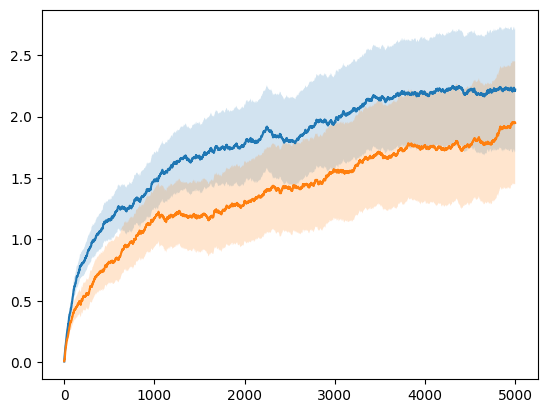

In [31]:
row = 14
plt.plot(c, fs_df[c].loc[row])
plt.fill_between(c, fs_df[low_keys].loc[row],fs_df[high_keys].loc[row],alpha=0.2)
plt.plot(c, ar_df[c].loc[row])
plt.fill_between(c, ar_df[low_keys].loc[row],ar_df[high_keys].loc[row],alpha=0.2)